In [8]:
from matplotlib import pyplot as plt

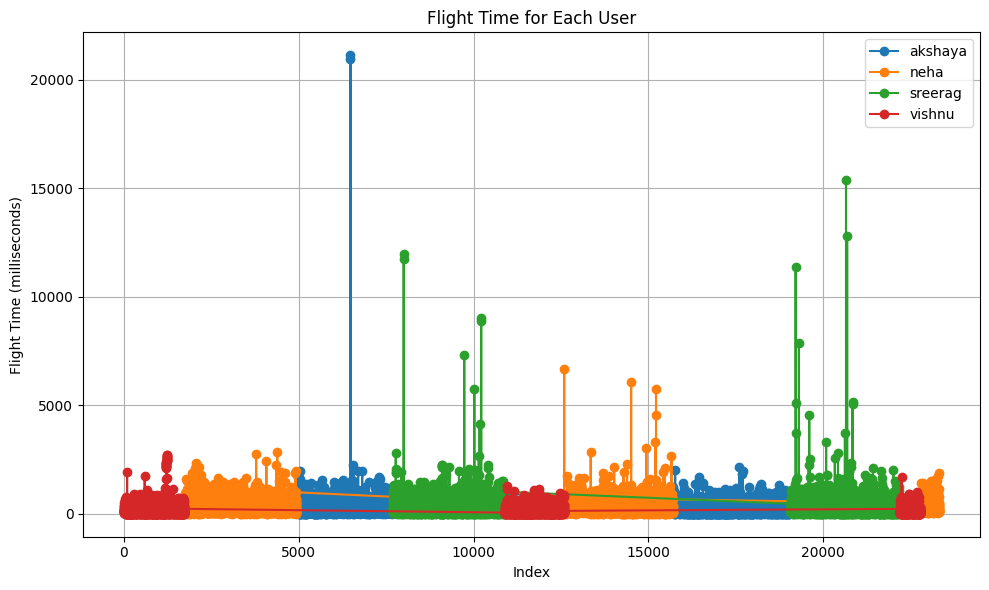

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read final_data1.csv
flight_data = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Plot flight times for each user
plt.figure(figsize=(10, 6))
for user, group in flight_data.groupby('user_name'):
    plt.plot(group.index, group['flight_time'], marker='o', label=user)

plt.title('Flight Time for Each User')
plt.xlabel('Index')
plt.ylabel('Flight Time (milliseconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

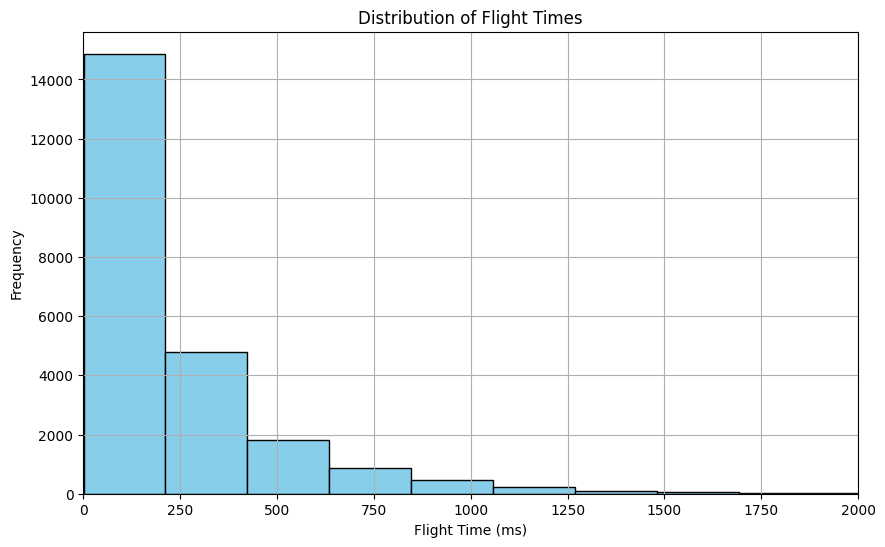

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read data from final_data1.csv
final_data = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Plot histogram of flight times
plt.figure(figsize=(10, 6))
plt.hist(final_data['flight_time'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Times')
plt.xlabel('Flight Time (ms)')
plt.ylabel('Frequency')
plt.grid(True)

# Set X-axis limits (example: from 0 to 500 ms)
plt.xlim(0, 2000)

# Uncomment the next line to use a logarithmic scale for the x-axis
# plt.xscale('log')

plt.show()


In [11]:
final_data = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')
df = pd.DataFrame(final_data)
df

,user_name,from_key,to_key,flight_time
0,vishnu,,g,377
1,vishnu,,o,496
2,vishnu,o,o,61
3,vishnu,o,f,165
4,vishnu,o,,135
...,...,...,...,...
23310,neha,r,o,374
23311,neha,o,k,151
23312,neha,k,e,86
23313,neha,e,s,1863


In [12]:
df.describe

<bound method NDFrame.describe of       user_name from_key to_key  flight_time
0        vishnu               g          377
1        vishnu               o          496
2        vishnu        o      o           61
3        vishnu        o      f          165
4        vishnu        o                 135
...         ...      ...    ...          ...
23310      neha        r      o          374
23311      neha        o      k          151
23312      neha        k      e           86
23313      neha        e      s         1863
23314      neha        s      .         1151

[23315 rows x 4 columns]>

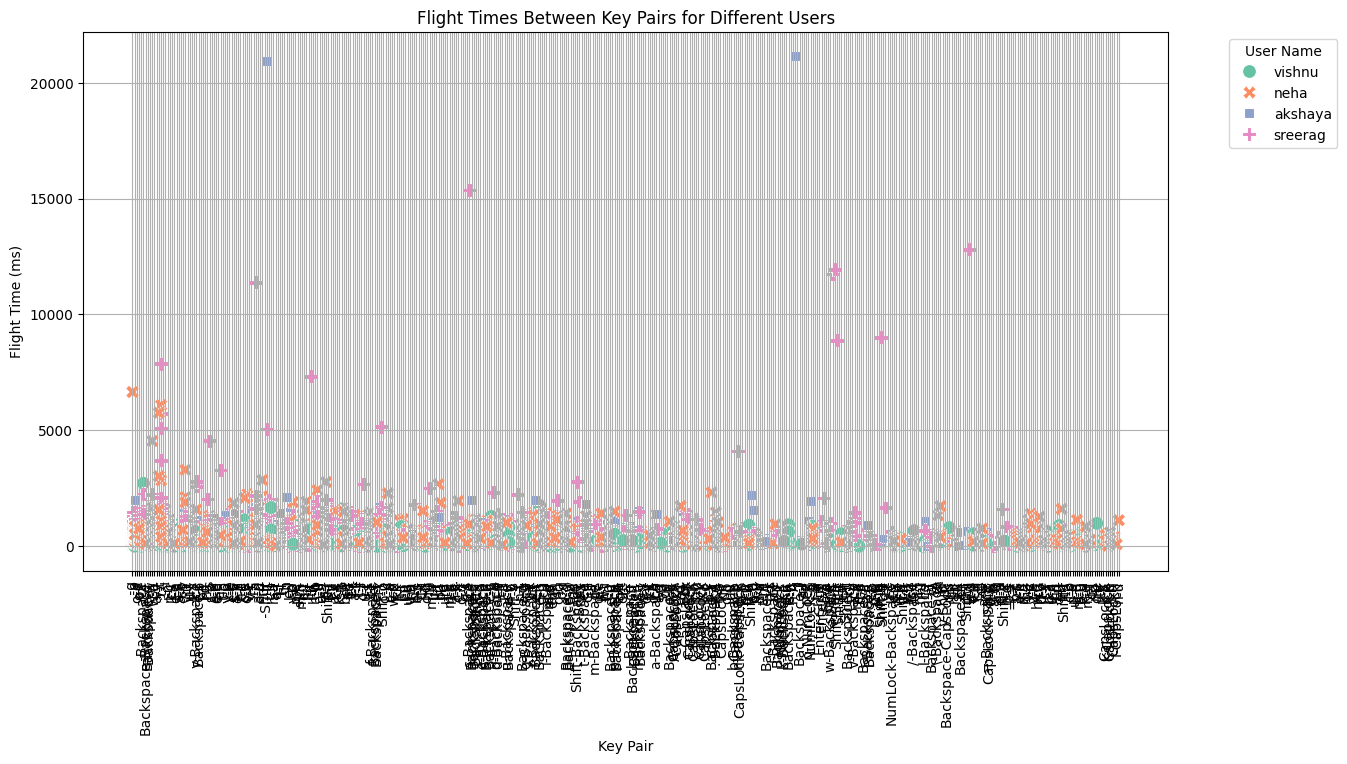

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
final_data = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Create a column for key pairs
final_data['key_pair'] = final_data['from_key'] + '-' + final_data['to_key']

# Step 2: Plot flight times using a scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=final_data,
    x='key_pair',
    y='flight_time',
    hue='user_name',
    palette='Set2',
    style='user_name',
    s=100  # Size of points
)

# Step 3: Enhance the plot
plt.title('Flight Times Between Key Pairs for Different Users')
plt.xlabel('Key Pair')
plt.ylabel('Flight Time (ms)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='User Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Random Forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the RandomForestClassifier
rf = RandomForestClassifier(max_samples=0.75, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.461076560154407


Grid Search

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter grid
param_grid = {
    'n_estimators': [20, 60, 100, 120],
    'max_features': [0.2, 0.6, 1.0],
    'max_depth': [2, 8, None],
    'max_samples': [0.5, 0.75, 1.0]
}

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Step 7: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Step 8: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = grid_search.best_estimator_

# Step 10: Predict and evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomSearchCV

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter distribution with conditional logic
param_dist = [
    {
        'n_estimators': [20, 60, 100, 120, 150],
        'max_features': np.linspace(0.2, 1.0, 10),
        'max_depth': [2, 8, None],
        'bootstrap': [True],
        'max_samples': np.linspace(0.5, 1.0, 10),
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    {
        'n_estimators': [20, 60, 100, 120],
        'max_features': np.linspace(0.2, 1.0, 10),
        'max_depth': [2, 8, None],
        'bootstrap': [False],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
]

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Step 7: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 8: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = random_search.best_estimator_

# Step 10: Predict and evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 0.6111111111111112, 'max_features': 0.2, 'max_depth': None, 'bootstrap': True}
Accuracy: 0.49844840961986037


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter distribution with conditional logic
param_dist = [
    {
        'n_estimators': [20, 60, 100, 120],
        'max_features': np.linspace(0.2, 1.0, 10),
        'max_depth': [2, 8, None],
        'bootstrap': [True],
        'max_samples': np.linspace(0.5, 1.0, 10),
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    {
        'n_estimators': [20, 60, 100, 120],
        'max_features': np.linspace(0.2, 1.0, 10),
        'max_depth': [2, 8, None],
        'bootstrap': [False],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
]

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Step 7: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 8: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = random_search.best_estimator_

# Step 10: Extract a single tree from the forest
tree = best_rf.estimators_[0]

# Step 11: Export the tree to Graphviz format
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=best_rf.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Step 12: Render the tree using Graphviz
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Saves the visualization as a file
graph.view()  # Opens the visualization


Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

GPT Code

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter distribution with conditional logic
# Step 5: Define the parameter distribution with conditional logic
# Step 5: Define the parameter distribution with conditional logic
param_dist = {
    'n_estimators': randint(100, 301),  # Sampling from integers between 100 and 300
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 0.2, 0.5],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_samples': [0.5, 0.75, 1.0],  # Corrected parameter name
    'bootstrap': [True, False],
    'random_state': [42]
}

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Step 7: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 8: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = random_search.best_estimator_

# Step 10: Predict and evaluate the best model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
68 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108, 'random_state': 42}
Accuracy: 0.5073700543056633


Imputing Random Forest

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 1: Read the dataset
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Impute empty values with 'space'
df['from_key'] = df['from_key'].fillna('space')
df['to_key'] = df['to_key'].fillna('space')

# Step 3: Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' to handle unseen categories during transform
encoded_features = encoder.fit_transform(df[['from_key', 'to_key']])

# Step 4: Create a DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features)

X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Example:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


NameError: name 'df_encoded' is not defined

NameError: name 'df_encoded' is not defined

Grid Search after imputation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='accuracy',
                           verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.8s
[CV] END ma

RandomizedSearchCV after imputation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=3,  # 3-fold cross-validation
                                   scoring='accuracy',
                                   verbose=2,
                                   random_state=42)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.5s
[CV] END max_depth=8, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.4s
[CV] END max_depth=8, min_samples_leaf=15, min_samples_split=12, n_estimators=171; total time=   0.4s
[CV] END max_depth=34, min_samples_leaf=7, min_samples_split=12, n_estimators=558; total time=   2.5s
[CV] END max_depth=34, min_samples_leaf=7, min_samples_split=12, n_estimators=558; total time=   2.4s
[CV] END max_depth=34, min_samples_leaf=7, min_samples_split=12, n_estimators=558; total time=   2.6s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   2.3s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   2.3s
[CV] END max_depth=9, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   2.4s
[CV] END max_depth=24, mi

RandomSearchCV and one-hot encoding

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['from_key', 'to_key'])

# Step 3: Define features (X) and labels (y)
X = df_encoded.drop(columns=['user_name'])
y = df_encoded['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter distribution with conditional logic
param_dist = {
    'n_estimators': randint(100, 301),  # Sampling from integers between 100 and 300
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 0.2, 0.5],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_samples': [0.5, 0.75, 1.0],  # Corrected parameter name
    'bootstrap': [True, False],
    'random_state': [42]
}

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Step 7: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 8: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = random_search.best_estimator_

# Step 10: Predict and evaluate the best model
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108, 'random_state': 42}
Train Accuracy: 0.6896819239720714
Test Accuracy: 0.5073700543056633


RandomSearchCV and label encoding

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()
df['from_key'] = label_encoder.fit_transform(df['from_key'])
df['to_key'] = label_encoder.fit_transform(df['to_key'])

# Step 3: Define features (X) and labels (y)
X = df.drop(columns=['user_name'])
y = df['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter distribution with conditional logic
param_dist = {
    'n_estimators': randint(100, 301),  # Sampling from integers between 100 and 300
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 0.2, 0.5],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_samples': [0.5, 0.75, 1.0],  # Corrected parameter name
    'bootstrap': [True, False],
    'random_state': [42]
}

# Step 6: Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Step 7: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 8: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 9: Get the best model
best_rf = random_search.best_estimator_

# Step 10: Predict and evaluate the best model
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 263, 'random_state': 42}
Train Accuracy: 0.6863847944142746
Test Accuracy: 0.5100853374709077


RandomSearchCV, label encoding, standardization and normalization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()
df['from_key'] = label_encoder.fit_transform(df['from_key'])
df['to_key'] = label_encoder.fit_transform(df['to_key'])

# Step 3: Define features (X) and labels (y)
X = df.drop(columns=['user_name'])
y = df['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply normalization to the features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Step 7: Define the parameter distribution with conditional logic
param_dist = {
    'n_estimators': randint(100, 301),  # Sampling from integers between 100 and 300
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 0.2, 0.5],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_samples': [0.5, 0.75, 1.0],  # Corrected parameter name
    'bootstrap': [True, False],
    'random_state': [42]
}

# Step 8: Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Step 9: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 10: Fit RandomizedSearchCV with standardized features
random_search.fit(X_train_scaled, y_train)

# Step 11: Get the best model
best_rf_scaled = random_search.best_estimator_

# Step 12: Predict and evaluate the best model with standardized features
y_train_pred_scaled = best_rf_scaled.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)

y_test_pred_scaled = best_rf_scaled.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Best Parameters (Standardized):", random_search.best_params_)
print("Train Accuracy (Standardized):", train_accuracy_scaled)
print("Test Accuracy (Standardized):", test_accuracy_scaled)

# Step 13: Fit RandomizedSearchCV with normalized features
random_search.fit(X_train_normalized, y_train)

# Step 14: Get the best model
best_rf_normalized = random_search.best_estimator_

# Step 15: Predict and evaluate the best model with normalized features
y_train_pred_normalized = best_rf_normalized.predict(X_train_normalized)
train_accuracy_normalized = accuracy_score(y_train, y_train_pred_normalized)

y_test_pred_normalized = best_rf_normalized.predict(X_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, y_test_pred_normalized)

print("\nBest Parameters (Normalized):", random_search.best_params_)
print("Train Accuracy (Normalized):", train_accuracy_normalized)
print("Test Accuracy (Normalized):", test_accuracy_normalized)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Parameters (Standardized): {'bootstrap': True, 'max_depth': 20, 'max_features': 0.2, 'max_samples': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 112, 'random_state': 42}
Train Accuracy (Standardized): 0.7340961986035687
Test Accuracy (Standardized): 0.5100853374709077
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter


Best Parameters (Normalized): {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 263, 'random_state': 42}
Train Accuracy (Normalized): 0.6866757176105508
Test Accuracy (Normalized): 0.5104732350659426


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()
df['from_key'] = label_encoder.fit_transform(df['from_key'])
df['to_key'] = label_encoder.fit_transform(df['to_key'])

# Step 3: Define features (X) and labels (y)
X = df.drop(columns=['user_name'])
y = df['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Define the parameter distribution with conditional logic
param_dist = {
    'n_estimators': randint(100, 301),  # Sampling from integers between 100 and 300
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt', 0.2, 0.5],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_samples': [0.5, 0.75, 1.0],  # Corrected parameter name
    'bootstrap': [True, False],
    'random_state': [42]
}

# Step 8: Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Step 9: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Step 10: Fit RandomizedSearchCV with standardized features
random_search.fit(X_train_scaled, y_train)

# Step 11: Get the best model
best_rf_scaled = random_search.best_estimator_

# Step 12: Predict and evaluate the best model with standardized features
y_train_pred_scaled = best_rf_scaled.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)

y_test_pred_scaled = best_rf_scaled.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Best Parameters (Standardized):", random_search.best_params_)
print("Train Accuracy (Standardized):", train_accuracy_scaled)
print("Test Accuracy (Standardized):", test_accuracy_scaled)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Parameters (Standardized): {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 263, 'random_state': 42}
Train Accuracy (Standardized): 0.6759060690542569
Test Accuracy (Standardized): 0.4988205018228608


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()
df['from_key'] = label_encoder.fit_transform(df['from_key'])
df['to_key'] = label_encoder.fit_transform(df['to_key'])

# Step 3: Define features (X) and labels (y)
X = df.drop(columns=['user_name'])
y = df['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the best parameters provided
best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 0.5,
    'max_samples': 0.5,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 263,
    'random_state': 42
}

# Step 7: Initialize the RandomForestClassifier with best parameters
rf = RandomForestClassifier(**best_params)

# Step 8: Fit the RandomForestClassifier with standardized features
rf.fit(X_train_scaled, y_train)

# Step 9: Predict and evaluate the model with standardized features
y_train_pred_scaled = rf.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)

y_test_pred_scaled = rf.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Best Parameters (Standardized):", best_params)
print("Train Accuracy (Standardized):", train_accuracy_scaled)
print("Test Accuracy (Standardized):", test_accuracy_scaled)

# Step 10: Save the trained model to a pickle file
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print("Model saved to", filename)


Best Parameters (Standardized): {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 263, 'random_state': 42}
Train Accuracy (Standardized): 0.6862878200155159
Test Accuracy (Standardized): 0.5120248254460822
Model saved to random_forest_model.pkl


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Step 1: Read data from final_data1.csv
df = pd.read_csv(r'D:\Keystroke_Dynamics_flight_time\data\processed\final_data1.csv')

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()
df['from_key'] = label_encoder.fit_transform(df['from_key'])
df['to_key'] = label_encoder.fit_transform(df['to_key'])

# Save the label encoder's classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

# Step 3: Define features (X) and labels (y)
X = df.drop(columns=['user_name'])
y = df['user_name']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Define the best parameters
best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 0.5,
    'max_samples': 0.5,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 263,
    'random_state': 42
}

# Initialize and train the RandomForestClassifier with the best parameters
rf = RandomForestClassifier(**best_params)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_train_pred_scaled = rf.predict(X_train_scaled)
train_accuracy_scaled = accuracy_score(y_train, y_train_pred_scaled)

y_test_pred_scaled = rf.predict(X_test_scaled)
test_accuracy_scaled = accuracy_score(y_test, y_test_pred_scaled)

print("Best Parameters (Standardized):", best_params)
print("Train Accuracy (Standardized):", train_accuracy_scaled)
print("Test Accuracy (Standardized):", test_accuracy_scaled)

# Save the trained model to a pickle file
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print("Model saved to", filename)


Best Parameters (Standardized): {'bootstrap': True, 'max_depth': None, 'max_features': 0.5, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 263, 'random_state': 42}
Train Accuracy (Standardized): 0.6755825915820548
Test Accuracy (Standardized): 0.5118067978533095
Model saved to random_forest_model.pkl


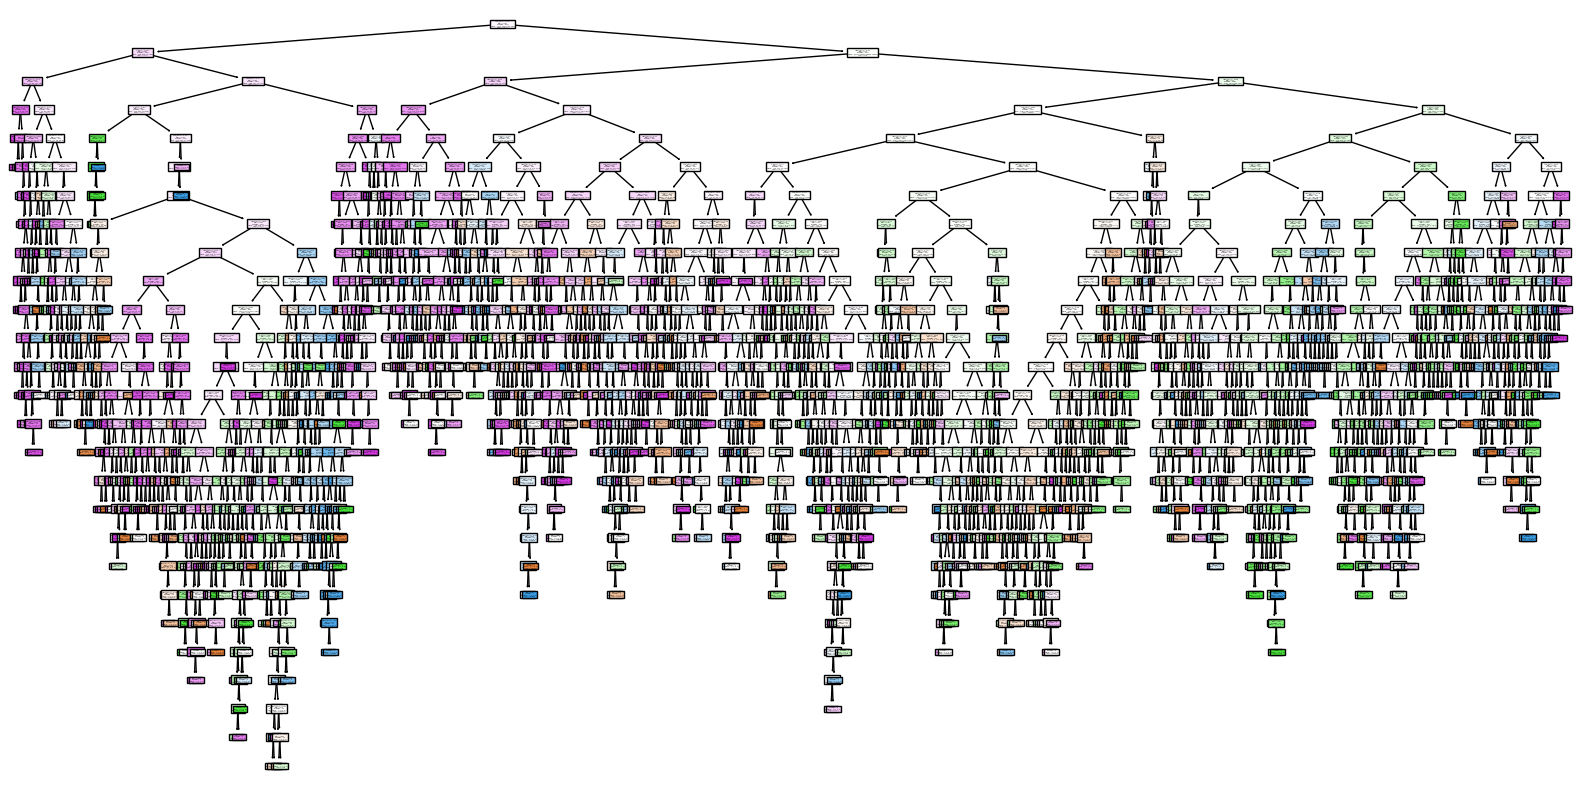

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf' is your trained Random Forest model
# Get the first tree from the forest (you can choose any tree)
first_tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=X.columns, class_names=rf.classes_)
plt.show()
